In [2]:
#Project 1 | Supervised Learning Solution

In [4]:
import pandas as pd

In [14]:
#1. Import and store the data in a data frame - Imported and also used the column names from description URL to get columns updated

df=pd.read_csv('http://www.stat.ufl.edu/~winner/data/airq402.dat',
            header=None, delim_whitespace=True, engine='python')

df.columns=['City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share','Average fare1','Low price airline','market share1','price']

In [20]:
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare1,Low price airline,market share1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [18]:
# Remove the outliers. Calculate IQR

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Average Fare                  71.4175
Distance                     899.0000
Average weekly passengers    512.7150
market share                  27.0000
Average fare1                 78.8925
market share1                 39.7775
price                         54.7625
dtype: float64


In [21]:
newdf = df[~((df[['Average Fare','Distance','Average weekly passengers','market share','Average fare1','market share1','price']] < (Q1 - 1.5 * IQR)) |(df[['Average Fare','Distance','Average weekly passengers','market share','Average fare1','market share1','price']] > (Q3 + 1.5 * IQR))).any(axis=1)]
newdf.shape

(885, 11)

In [23]:
# Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable and split the table.


x=newdf[['Average Fare']]
y=newdf[['City1','City2','Distance','Average weekly passengers','market leading airline','market share','Average fare1','Low price airline','market share1','price']]

In [26]:
newdf.corr()

,Average Fare,Distance,Average weekly passengers,market share,Average fare1,market share1,price
Average Fare,1.000000,0.522650,-0.197005,-0.207955,0.979713,-0.493555,0.840993
Distance,0.522650,1.000000,-0.129632,-0.547952,0.489721,-0.361519,0.539894
Average weekly passengers,-0.197005,-0.129632,1.000000,0.021769,-0.163736,0.076176,-0.209018
market share,-0.207955,-0.547952,0.021769,1.000000,-0.193382,0.281182,-0.314555
Average fare1,0.979713,0.489721,-0.163736,-0.193382,1.000000,-0.519442,0.794157
market share1,-0.493555,-0.361519,0.076176,0.281182,-0.519442,1.000000,-0.260912
price,0.840993,0.539894,-0.209018,-0.314555,0.794157,-0.260912,1.000000


In [28]:
# Drop the independent variables which has less than 0.1 correlation with the dependent variable

y.drop(['Average weekly passengers', 'market share','market share1'], axis=1)

,City1,City2,Distance,market leading airline,Average fare1,Low price airline,price
0,CAK,ATL,528,FL,111.03,FL,111.03
1,CAK,MCO,860,FL,123.09,DL,118.94
2,ALB,ATL,852,DL,223.98,CO,167.12
3,ALB,BWI,288,WN,68.86,WN,68.86
4,ALB,ORD,723,UA,161.36,WN,145.42
5,ALB,FLL,1204,WN,137.97,DL,127.69
6,ALB,LAS,2237,WN,148.59,WN,148.59
7,ALB,LAX,2467,DL,205.06,US,174.00
8,ALB,MCO,1073,WN,127.69,WN,127.69
9,ALB,TPA,1130,US,132.91,DL,124.78


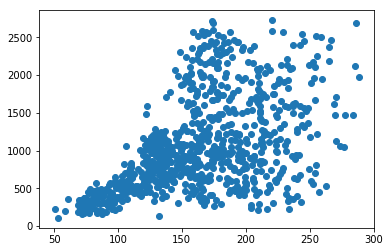

In [31]:
#Create scatter Plot of Independent Variable vs Dependent Variable
import matplotlib.pyplot as plt

plt.scatter(x,y[['Distance']])
plt.show()

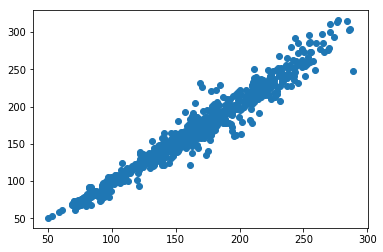

In [33]:
plt.scatter(x,y[['Average fare1']])
plt.show()

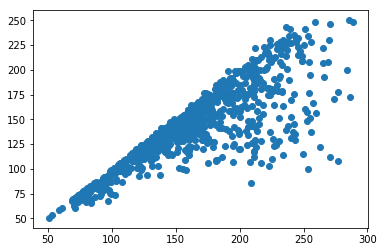

In [35]:
plt.scatter(x,y[['price']])
plt.show()

In [38]:
#Divide the data set into training and test data set and build a Multiple Linear Regression model.
y=y[['Distance','Average fare1','price']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
#7.Print the coefficients & intercepts of the linear regression model

model.coef_

array([[6.66879063],
       [1.07107712],
       [0.71910494]])

In [41]:
model.intercept_

array([-33.97049538,  -8.99721845,  26.00007456])